In [1]:
!nvidia-smi

Wed Nov 15 04:18:50 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P8    11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [3]:
# Pip install method (recommended)

!pip install ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.209 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.7/78.2 GB disk)


In [4]:
from ultralytics import YOLO

from IPython.display import display, Image

In [5]:
!mkdir '{HOME}/datasets'
DATA_DIR='/content/datasets'

In [6]:
!gdown 1MOy04R3IWGdiIIadLQJTxPPkdNkQKAKW -O dataset.zip

Downloading...
From: https://drive.google.com/uc?id=1MOy04R3IWGdiIIadLQJTxPPkdNkQKAKW
To: /content/dataset.zip
100% 10.1M/10.1M [00:00<00:00, 24.7MB/s]


In [7]:
!unzip "dataset.zip" -d "datasets"

Streaming output truncated to the last 5000 lines.
  inflating: datasets/train/V/56387_png.rf.093a514fe2ea25b014e2973bd5155fbf.jpg  
  inflating: datasets/train/V/56495_png.rf.55cde26bff3fc1dfbad4ebe5346dcc18.jpg  
  inflating: datasets/train/V/56639_png.rf.87857d79a96db8c0d59738ff17ddac83.jpg  
  inflating: datasets/train/V/56747_png.rf.21e8f269fc45813d475df8c9bdb2aabc.jpg  
  inflating: datasets/train/V/57215_png.rf.063b9b7a9bc9a316ab889c56b09c0415.jpg  
  inflating: datasets/train/V/57863_png.rf.6869d352aff61c9881b60953270e21b0.jpg  
  inflating: datasets/train/V/57899_png.rf.1f8090dd774529a615678c18f81dec06.jpg  
  inflating: datasets/train/V/57971_png.rf.0ae07c075333068716f32789340bc5c3.jpg  
  inflating: datasets/train/V/58259_png.rf.27f68f00056a807a13180e0ea3d9126a.jpg  
  inflating: datasets/train/V/58511_png.rf.c7984d7c65c3c2c171ff99fcebacd158.jpg  
  inflating: datasets/train/V/58547_png.rf.8639888a352f64db409bd0ba41f17459.jpg  
  inflating: datasets/train/V/58691_png.rf.55eb

In [8]:
%cd {HOME}

!yolo task=classify mode=train model=yolov8m-cls.pt data='{DATA_DIR}' epochs=10 imgsz=128

/content
100% 32.7M/32.7M [00:00<00:00, 244MB/s]
Ultralytics YOLOv8.0.209 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=classify, mode=train, model=yolov8m-cls.pt, data=/content/datasets, epochs=10, patience=50, batch=16, imgsz=128, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, box

In [14]:
%cd {HOME}

!yolo task=classify mode=val model={HOME}/runs/classify/train/weights/best.pt data='{DATA_DIR}'

/content
Ultralytics YOLOv8.0.209 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8m-cls summary (fused): 103 layers, 15808772 parameters, 0 gradients, 41.7 GFLOPs
WARNING ⚠️ Dataset 'split=val' not found, using 'split=test' instead.
train: /content/datasets/train... found 5283 images in 36 classes ✅ 
val: None...
test: /content/datasets/test... found 347 images in 36 classes ✅ 
Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 445, in entrypoint
    getattr(model, mode)(**overrides)  # default args from model
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/engine/model.py", line 273, in val
    validator(model=self.model)
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/_contextlib.py", line 115, in decorate_context
    return func(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/ultr

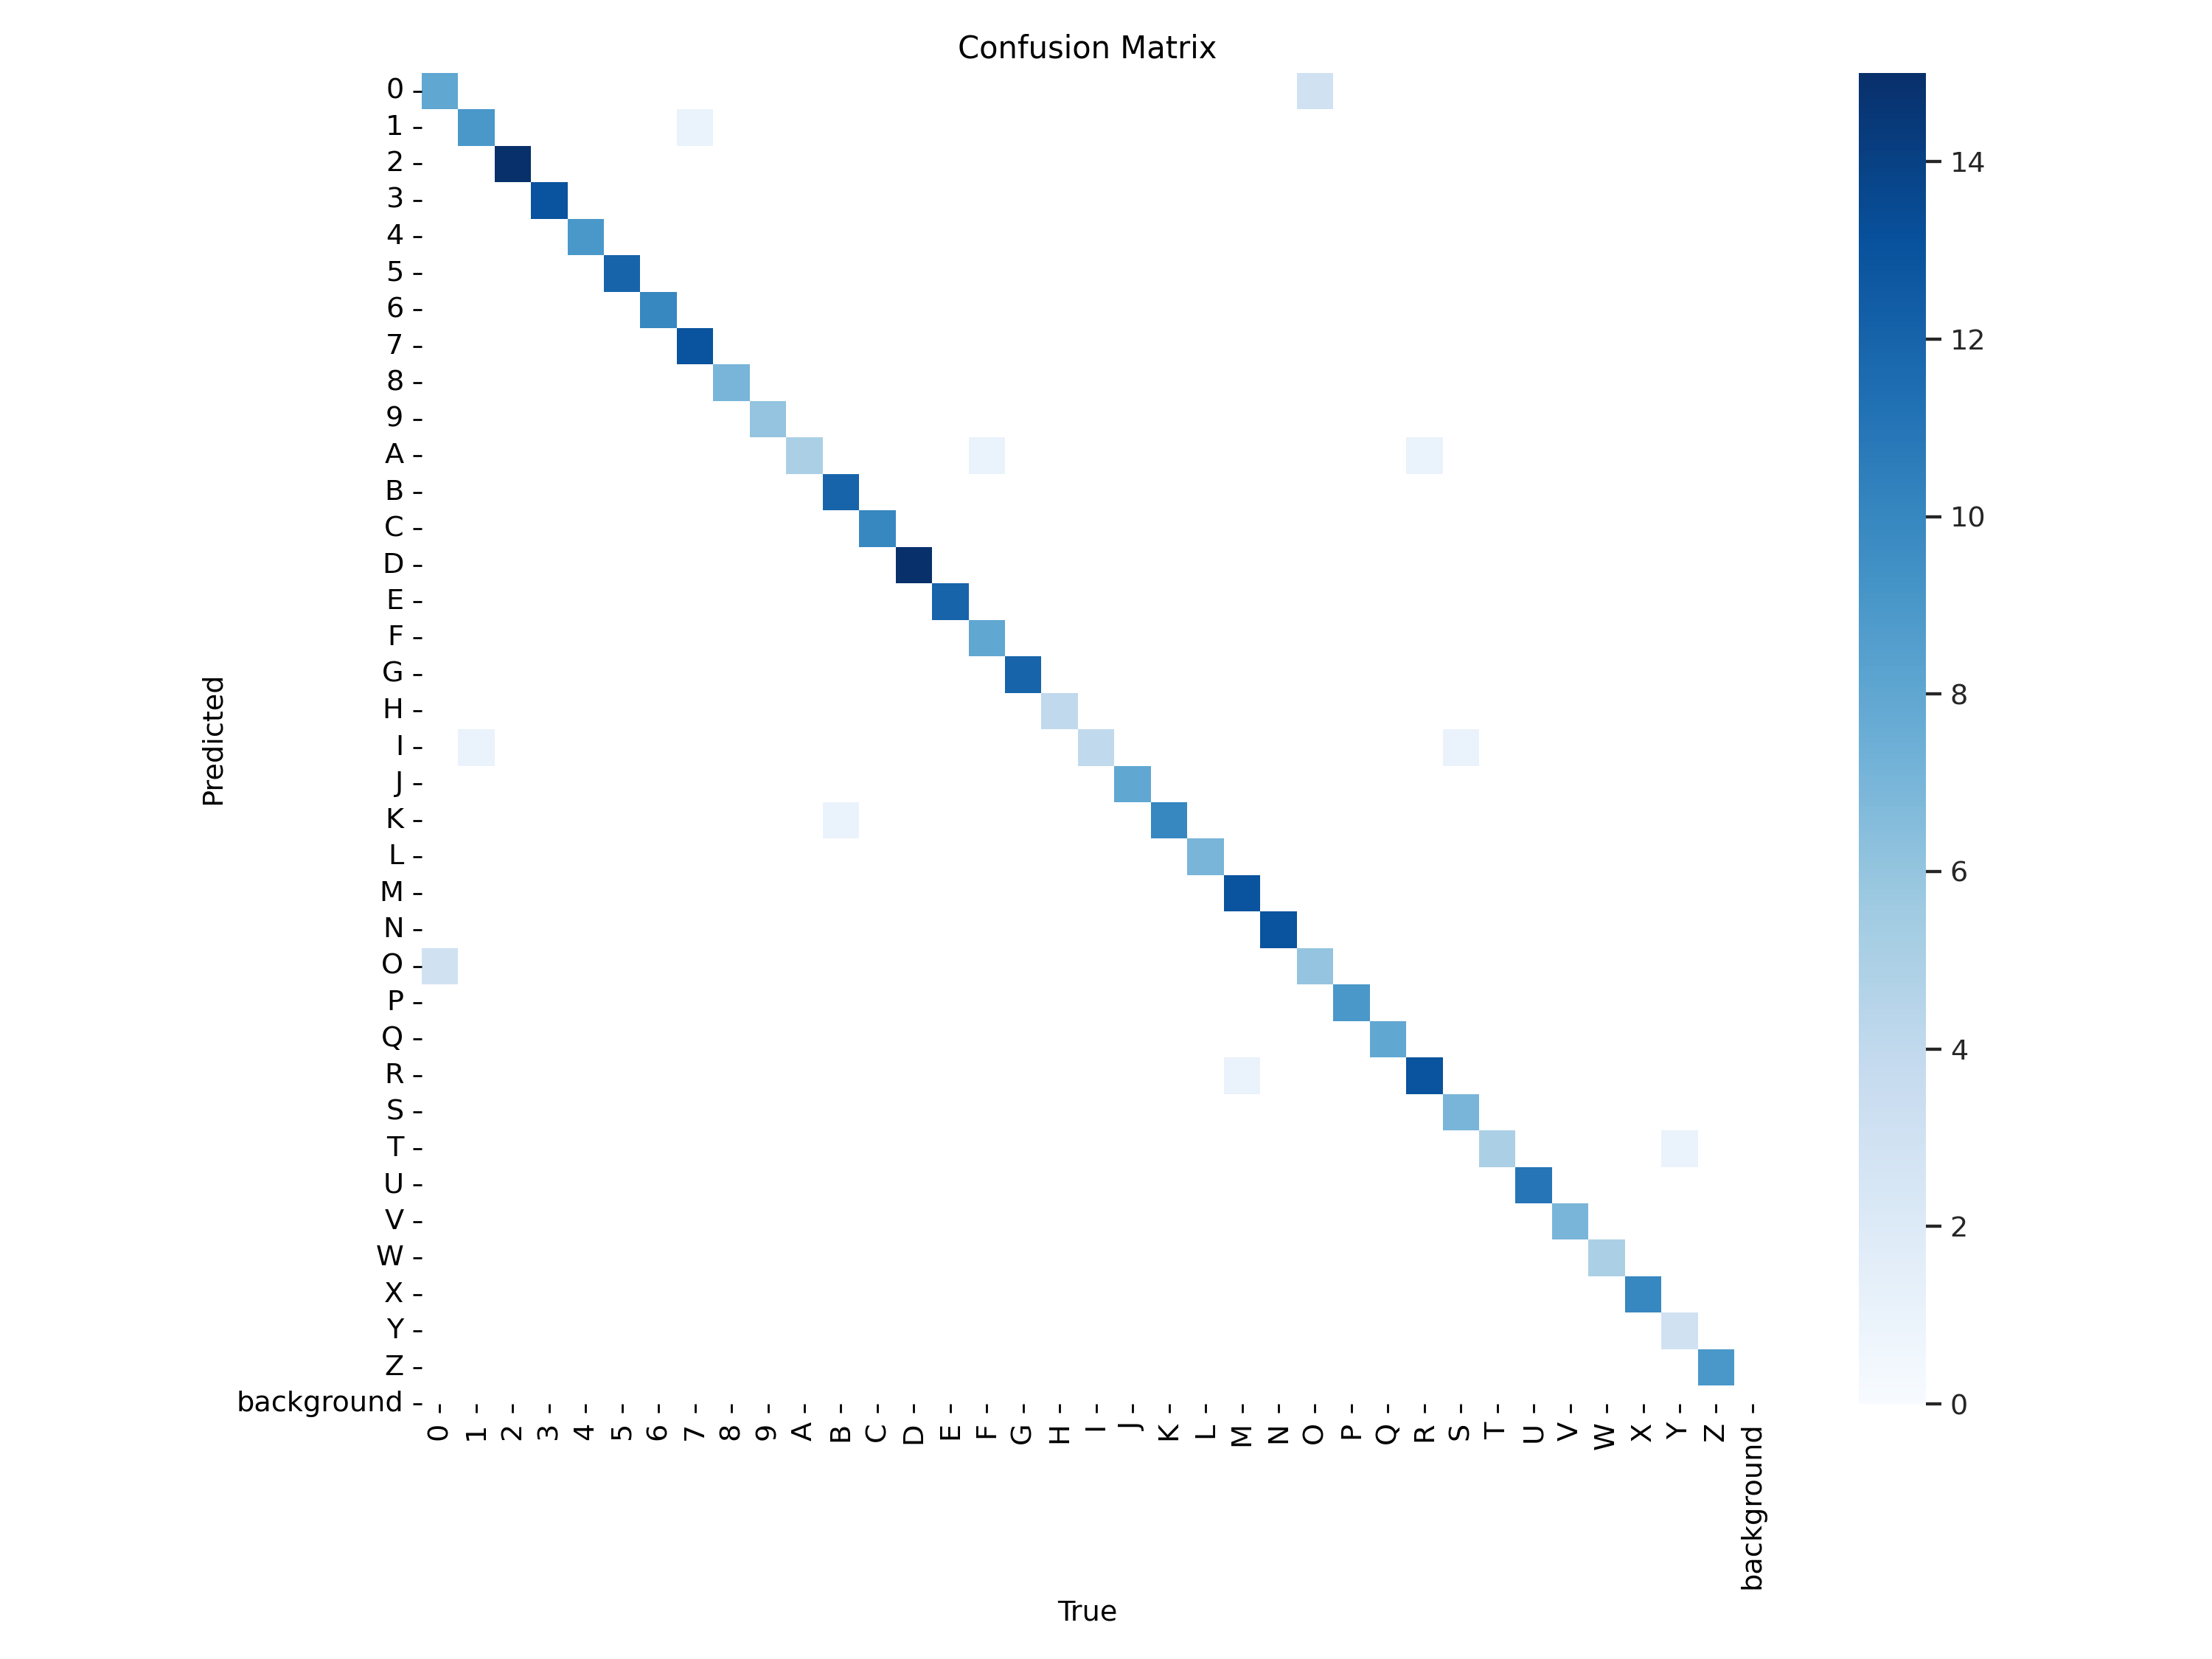

In [15]:
Image(filename=f'{HOME}/runs/classify/train/confusion_matrix.png')

In [16]:
%cd {HOME}
!yolo task=classify mode=predict model={HOME}/runs/classify/train/weights/best.pt conf=0.25 source="{DATA_DIR}/test/3"

/content
Ultralytics YOLOv8.0.209 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8m-cls summary (fused): 103 layers, 15808772 parameters, 0 gradients, 41.7 GFLOPs

image 1/13 /content/datasets/test/3/17319_png.rf.3dc70118907d579dcbc321d964c57979.jpg: 128x128 3 1.00, K 0.00, R 0.00, B 0.00, Z 0.00, 5.6ms
image 2/13 /content/datasets/test/3/45595_png.rf.8d63a2ad81200dc01f49e8b077fcfa22.jpg: 128x128 3 1.00, 5 0.00, 8 0.00, R 0.00, B 0.00, 6.4ms
image 3/13 /content/datasets/test/3/46783_png.rf.eae453cef9bd314a4d7a60936ff892bc.jpg: 128x128 3 1.00, K 0.00, 8 0.00, R 0.00, B 0.00, 6.4ms
image 4/13 /content/datasets/test/3/47035_png.rf.68695d1534554cb2e4d85b6b652d03d8.jpg: 128x128 3 1.00, 8 0.00, B 0.00, F 0.00, R 0.00, 5.3ms
image 5/13 /content/datasets/test/3/47755_png.rf.7e5d5e48272b9164317f24e370192ca9.jpg: 128x128 3 1.00, 5 0.00, 8 0.00, B 0.00, R 0.00, 5.3ms
image 6/13 /content/datasets/test/3/48151_png.rf.e0e69ece334e111a942fdcd864eceab3.jpg: 128x128 3 1.00, R 0.00,

In [17]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/classify/predict/*.jpg')[:10]:
      display(Image(filename=image_path, height=600))
      print("\n")

In [18]:
!yolo export model={HOME}/runs/classify/train/weights/best.pt format=onnx

Ultralytics YOLOv8.0.209 🚀 Python-3.10.12 torch-2.1.0+cu118 CPU (Intel Xeon 2.00GHz)
YOLOv8m-cls summary (fused): 103 layers, 15808772 parameters, 0 gradients, 41.7 GFLOPs

PyTorch: starting from '/content/runs/classify/train/weights/best.pt' with input shape (1, 3, 128, 128) BCHW and output shape(s) (1, 36) (30.3 MB)
requirements: Ultralytics requirement ['onnx>=1.12.0'] not found, attempting AutoUpdate...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 81.0 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 8.7s, installed 1 package: ['onnx>=1.12.0']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.15.0 opset 17...
ONNX: export success ✅ 9.6s, saved as '/content/runs/classify/train/weights/best.onnx' (60.3 MB)

Export complete (11.7s)
Results saved to /content/runs/classify/train/weights
Predict:         yolo predict task=classify model=/content/runs/classify/train/weights/best.onnx imgsz=128  
Validate:    

In [19]:
from google.colab import files
files.download('/content/runs/classify/train/weights/best.onnx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>